In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datamatdis_imupp.csv')

df.head()

,Nama,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,1,Menengah,Proyek pribadi,30 menit - 1 jam,> 10 Kali,4,4,3,5,3,4,3,4,Mengunggah data → Analisis data → Simpan hasil,Menulis / memperbaiki kode
1,2,Pemula,Tugas Kuliah,30 menit - 1 jam,≤ 5 Kali,3,3,3,5,3,3,2,4,Menulis kode → Menjalankan program → Debugging,Menulis / memperbaiki kode
2,3,Menengah,Tugas Kuliah,> 2 jam,> 10 Kali,5,4,1,5,4,4,4,4,Menulis kode → Error → Minta bantuan AI,Menjalankan program
3,4,Menengah,Tugas Kuliah,> 2 jam,> 10 Kali,5,5,1,5,5,5,5,5,Menulis kode → Error → Minta bantuan AI,Menulis / memperbaiki kode
4,5,Pemula,Tugas Kuliah,> 2 jam,> 10 Kali,5,5,3,5,4,2,3,5,Menulis kode → Error → Minta bantuan AI,Menjalankan program


X1: Status Pemrograman

X2: Jenis kegiatan menggunakan aplikasi untuk coding

X3: "Rata-rata waktu memakai aplikasi coding dalam sehari?  (Visual Studio Code, Google Colab, etc)"

X4: "Berapa kali kamu menggunakan aplikasi coding? (Visual Studio Code, Google Colab, etc)"

X5: Berapa kali kamu mengunggah data kedalam aplikasi coding?

X6: Berapa kali kamu menganalisis data atau menjalankan program analisis?

X7: Berapa kali kamu menulis atau memperbarui kode tanpa bantuan AI?

X8: Berapa kali kamu menjalankan atau menguji program (run/execute)?

X9: Berapa kali kamu meminta syntax atau potongan kode kepada AI?

X10: Berapa kali kamu menyelesaikan error atau bug dengan bantuan AI?

X11: Berapa kali kamu melakukan prompting AI untuk mengerjakan tugas coding secara langsung?

X12: Berapa kali kamu meminta AI menjelaskan logika atau teori kode?

X13: Urutan aktivitas yang paling sering kamu lakukan saat coding (pilih satu):

X14: "Setelah kamu menggunakan AI, aktivitas berikutnya yang paling sering kamu lakukan adalah:"

In [3]:
df.describe()

,Nama,X5,X6,X7,X8,X9,X10,X11,X12
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.000000,3.834862,3.844037,2.587156,4.229358,4.091743,4.036697,3.743119,4.119266
std,31.609598,1.182541,1.139967,1.073339,0.968323,0.799783,0.891592,0.946765,0.889494
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,28.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000
50%,55.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000
75%,82.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,109.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    109 non-null    int64 
 1   X1      109 non-null    object
 2   X2      109 non-null    object
 3   X3      109 non-null    object
 4   X4      109 non-null    object
 5   X5      109 non-null    int64 
 6   X6      109 non-null    int64 
 7   X7      109 non-null    int64 
 8   X8      109 non-null    int64 
 9   X9      109 non-null    int64 
 10  X10     109 non-null    int64 
 11  X11     109 non-null    int64 
 12  X12     109 non-null    int64 
 13  X13     109 non-null    object
 14  X14     109 non-null    object
dtypes: int64(9), object(6)
memory usage: 12.9+ KB


In [5]:
matrix_vars = ["X5","X6","X7","X8","X9","X10","X11","X12"]
matrix = df[matrix_vars].to_numpy()

print("\nMatriks Aktivitas (X5–X12):")
print(matrix)
print("Shape:", matrix.shape)


Matriks Aktivitas (X5–X12):
[[4 4 3 5 3 4 3 4]
 [3 3 3 5 3 3 2 4]
 [5 4 1 5 4 4 4 4]
 [5 5 1 5 5 5 5 5]
 [5 5 3 5 4 2 3 5]
 [5 5 2 5 5 5 5 5]
 [1 1 2 3 4 5 3 4]
 [3 3 4 5 4 4 4 4]
 [5 5 2 5 5 5 5 5]
 [4 4 2 5 4 4 4 5]
 [1 2 3 5 4 5 2 5]
 [3 5 2 5 5 5 4 4]
 [2 3 2 3 4 4 4 5]
 [5 5 1 5 5 5 5 5]
 [4 3 3 5 3 3 2 5]
 [2 2 3 4 3 3 5 5]
 [5 5 4 5 3 4 4 4]
 [5 4 3 5 3 4 3 3]
 [5 5 2 5 5 5 5 4]
 [4 4 1 4 5 5 5 5]
 [5 5 2 4 4 4 3 5]
 [5 5 5 5 5 5 5 5]
 [5 4 4 5 3 4 3 5]
 [2 1 1 3 4 4 4 4]
 [5 5 3 5 5 5 4 2]
 [5 5 2 5 3 3 3 2]
 [3 3 3 3 3 3 2 3]
 [4 4 3 5 4 4 4 4]
 [5 5 3 5 4 5 4 4]
 [2 2 1 2 4 5 4 5]
 [3 3 4 3 2 2 2 2]
 [2 2 1 2 4 4 3 5]
 [4 4 2 4 5 3 3 3]
 [4 4 4 4 4 4 4 4]
 [5 5 1 5 5 5 5 5]
 [3 3 2 3 4 3 4 5]
 [3 3 1 5 5 5 5 3]
 [5 5 2 5 4 3 3 4]
 [4 4 2 5 4 4 4 4]
 [5 5 5 5 4 4 4 4]
 [4 4 3 4 3 3 3 4]
 [5 5 3 5 5 5 5 5]
 [5 5 5 5 5 5 5 5]
 [3 3 3 4 3 4 3 4]
 [4 3 2 4 5 4 3 3]
 [5 5 3 5 4 4 4 4]
 [4 3 1 5 5 5 5 5]
 [3 4 5 5 5 5 5 5]
 [2 1 3 5 4 5 3 2]
 [2 3 3 2 2 2 2 2]
 [4 4 2 4 5 5 4 5]
 [

In [6]:
df["Mean_Activity"] = df[matrix_vars].mean(axis=1)
df["Total_Activity"] = df[matrix_vars].sum(axis=1)
df["Heavy_Coder"] = df["Mean_Activity"] >= 4
df["Rank_Total"] = df["Total_Activity"].rank(ascending=False).astype(int)

print("\n--- Evaluasi Logik & Aritmatik ---")
df[["Nama","Mean_Activity","Total_Activity","Heavy_Coder","Rank_Total"]]


--- Evaluasi Logik & Aritmatik ---


,Nama,Mean_Activity,Total_Activity,Heavy_Coder,Rank_Total
0,1,3.750,30,False,63
1,2,3.250,26,False,89
2,3,3.875,31,False,54
3,4,4.500,36,True,14
4,5,4.000,32,True,45
...,...,...,...,...,...
104,105,3.000,24,False,97
105,106,3.875,31,False,54
106,107,3.625,29,False,69
107,108,3.750,30,False,63


Kolom Mean_Activity menunjukkan nilai rata-rata dari seluruh variabel aktivitas (X5–X12) untuk tiap mahasiswa. Contohnya Responden 1 dengan nilai 3.75, artinya rata-rata aktivitasnya berada pada kategori cukup aktif. Lalu Aurelia Krisnanti Wijaya dengan nilai 4.50, artinya Aurelia memiliki rata-rata aktivitas sangat aktif. Semakin tinggi nilai ini semakin konsisten aktivitas codingnya.

Kolom total_activity adalah penjumlahan semua skor aktivitas, sehingga menunjukkan total intensitas coding seseorang. Responden 4 (36) memiliki aktivitas total tertinggi di contoh ini, Responden 5 (32) termasuk kelompok tinggi, dan nilai terendah dalam dataset ini berada di sekitar 24–26, menunjukkan aktivitas yang lebih rendah. Semakin tinggi total maka semakin aktif orang tersebut dalam semua indikator coding.

Selanjutnya evaluasi logika yaitu kolom heavy_coder. Pada kolom tersebut True menunjukkan rata-rata aktivitas >= 4 yang dianggap heavy coder (sangat aktif) dan false dengan rata-rata < 4 yang dianggap tidak terlalu aktif.

Yang terakhir rank total yang merupakan peringkat aktivitas sosial. Ranking diberikan berdasarkan total_activity, semakin besar nilai aktivitas maka peringkat lebih tinggi.

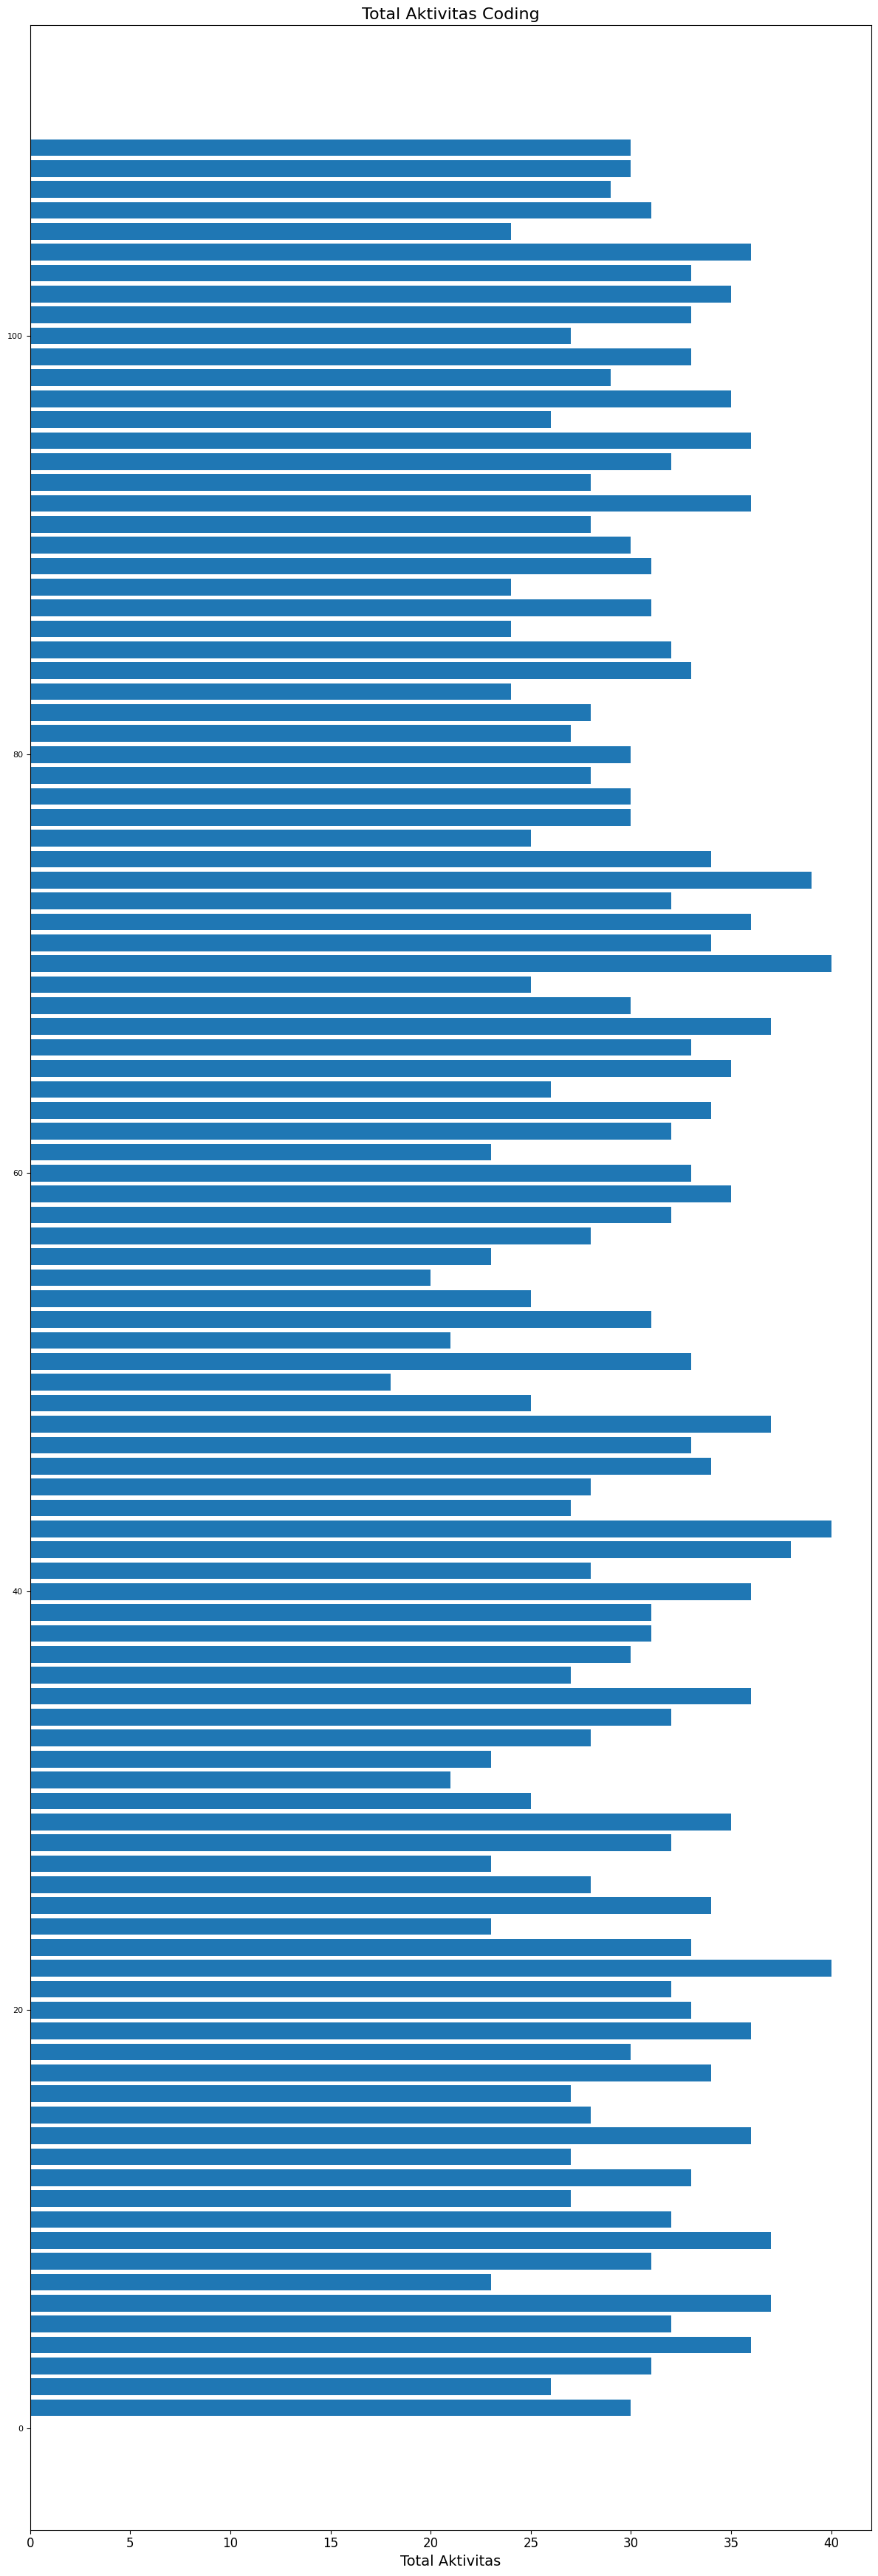

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 35))
plt.barh(df["Nama"], df["Total_Activity"])

plt.xlabel("Total Aktivitas", fontsize=14)
plt.title("Total Aktivitas Coding", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


Bar chart tersebut menunjukkan keseluruhan nilai total aktivitas yang dilakukan mahasiswa.

In [8]:
# Urutkan berdasarkan total aktivitas
df_sorted = df.sort_values("Total_Activity", ascending=False)

# Top 5 teratas
top5 = df_sorted.head(5)
print("=== TOP 5 TERATAS ===")
print(top5[["Nama", "Total_Activity"]])

# Top 5 terbawah
bottom5 = df_sorted.tail(5)
print("\n=== 5 TERENDAH ===")
print(bottom5[["Nama", "Total_Activity"]])


=== TOP 5 TERATAS ===
    Nama  Total_Activity
21    22              40
42    43              40
69    70              40
73    74              39
41    42              38

=== 5 TERENDAH ===
    Nama  Total_Activity
55    56              23
30    31              21
51    52              21
54    55              20
49    50              18


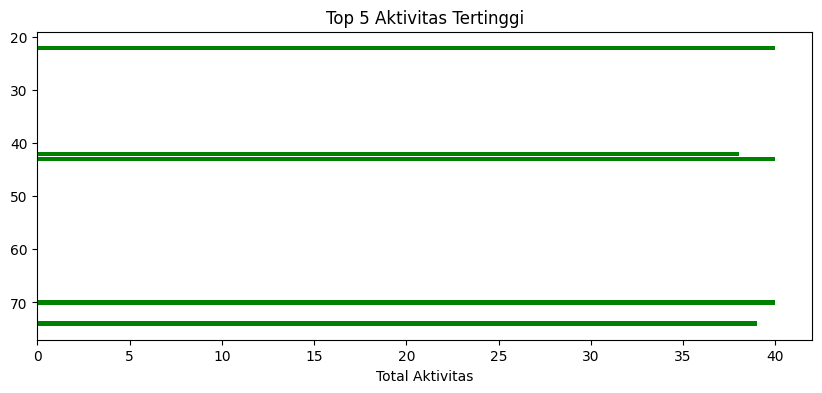

In [9]:
plt.figure(figsize=(10, 4))
plt.barh(top5["Nama"], top5["Total_Activity"], color="green")
plt.xlabel("Total Aktivitas")
plt.title("Top 5 Aktivitas Tertinggi")
plt.gca().invert_yaxis()
plt.show()


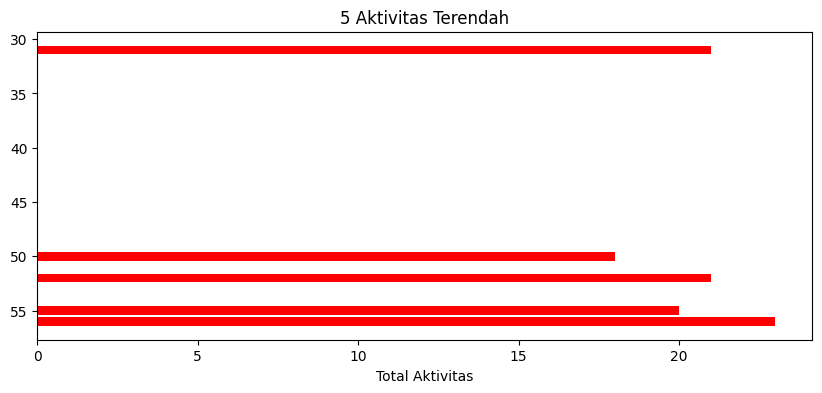

In [10]:
plt.figure(figsize=(10, 4))
plt.barh(bottom5["Nama"], bottom5["Total_Activity"], color="red")
plt.xlabel("Total Aktivitas")
plt.title("5 Aktivitas Terendah")
plt.gca().invert_yaxis()
plt.show()


Pada output diatas menampilkan top 5 aktivitas tertinggi dan terendah

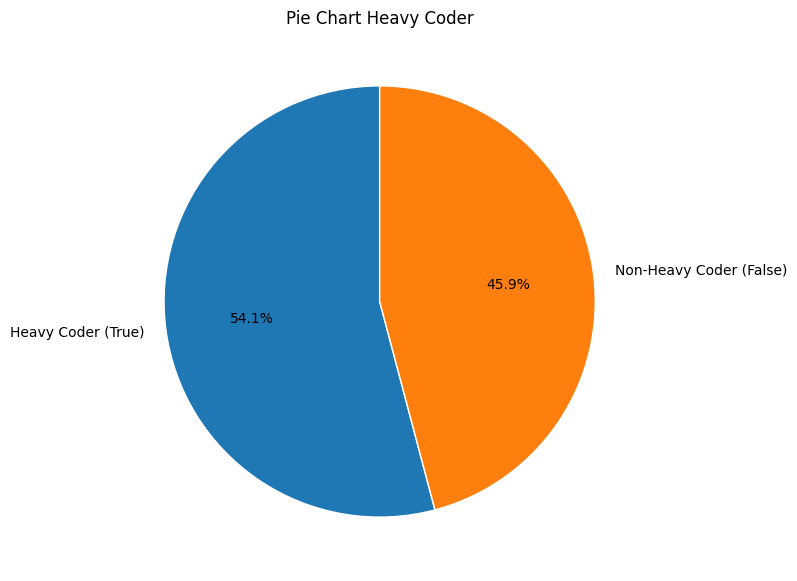

In [11]:
import matplotlib.pyplot as plt

# Hitung jumlah Heavy Coder dan Non-Heavy Coder
heavy_counts = df['Heavy_Coder'].value_counts()

# Label
labels = ['Heavy Coder (True)', 'Non-Heavy Coder (False)']

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(
    heavy_counts,
    labels=labels,
    autopct='%1.1f%%',   # tampilkan persentase
    startangle=90,        # rotasi awal biar rapi
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Pie Chart Heavy Coder')
plt.show()


Grafik pie menunjukkan proporsi mahasiswa yang termasuk kategori “Heavy Coder” (Mean_Activity ≥ 4) dibandingkan dengan yang tidak.

Nilai Heavy Coder menunjukkan 54.1%. Lebih dari setengah mahasiswa (sekitar 54%) memiliki rata-rata aktivitas coding ≥ 4. Ini menunjukkan bahwa sebagian besar mahasiswa:

- Terlibat aktif dalam aktivitas pemrograman,

- Memiliki skor tinggi pada variabel kegiatan coding yang kamu ukur,

- Berpotensi punya kemampuan pemrograman lebih kuat.

Selanjutnya nilai Non-Heavy Coder menunjukkan 45.9%. Sekitar 46% mahasiswa tidak mencapai rata-rata nilai 4. Namun jumlah ini masih cukup besar, sehingga:

- Kelompok ini mungkin perlu dukungan lebih dalam latihan coding,
- Variasi standar penilaian kegiatan coding cukup tinggi.

Selisih keduanya tidak terlalu jauh (sekitar 8%). Artinya distribusi kemampuan coding relatif seimbang ada banyak yang aktif, tapi hampir setengahnya juga berada pada level sedang.

In [12]:
# Label encoding untuk kolom kategorik
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_cols = ['X1','X2','X3','X4','X13','X14']

encoder = LabelEncoder()

for col in label_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])


In [13]:
num_df = df_encoded.select_dtypes(include=['int64', 'float64'])
num_df.head()


,Nama,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Mean_Activity,Total_Activity,Rank_Total
0,1,1,1,1,0,4,4,3,5,3,4,3,4,1,2,3.750,30,63
1,2,2,3,1,1,3,3,3,5,3,3,2,4,3,2,3.250,26,89
2,3,1,3,3,0,5,4,1,5,4,4,4,4,2,1,3.875,31,54
3,4,1,3,3,0,5,5,1,5,5,5,5,5,2,2,4.500,36,14
4,5,2,3,3,0,5,5,3,5,4,2,3,5,2,1,4.000,32,45


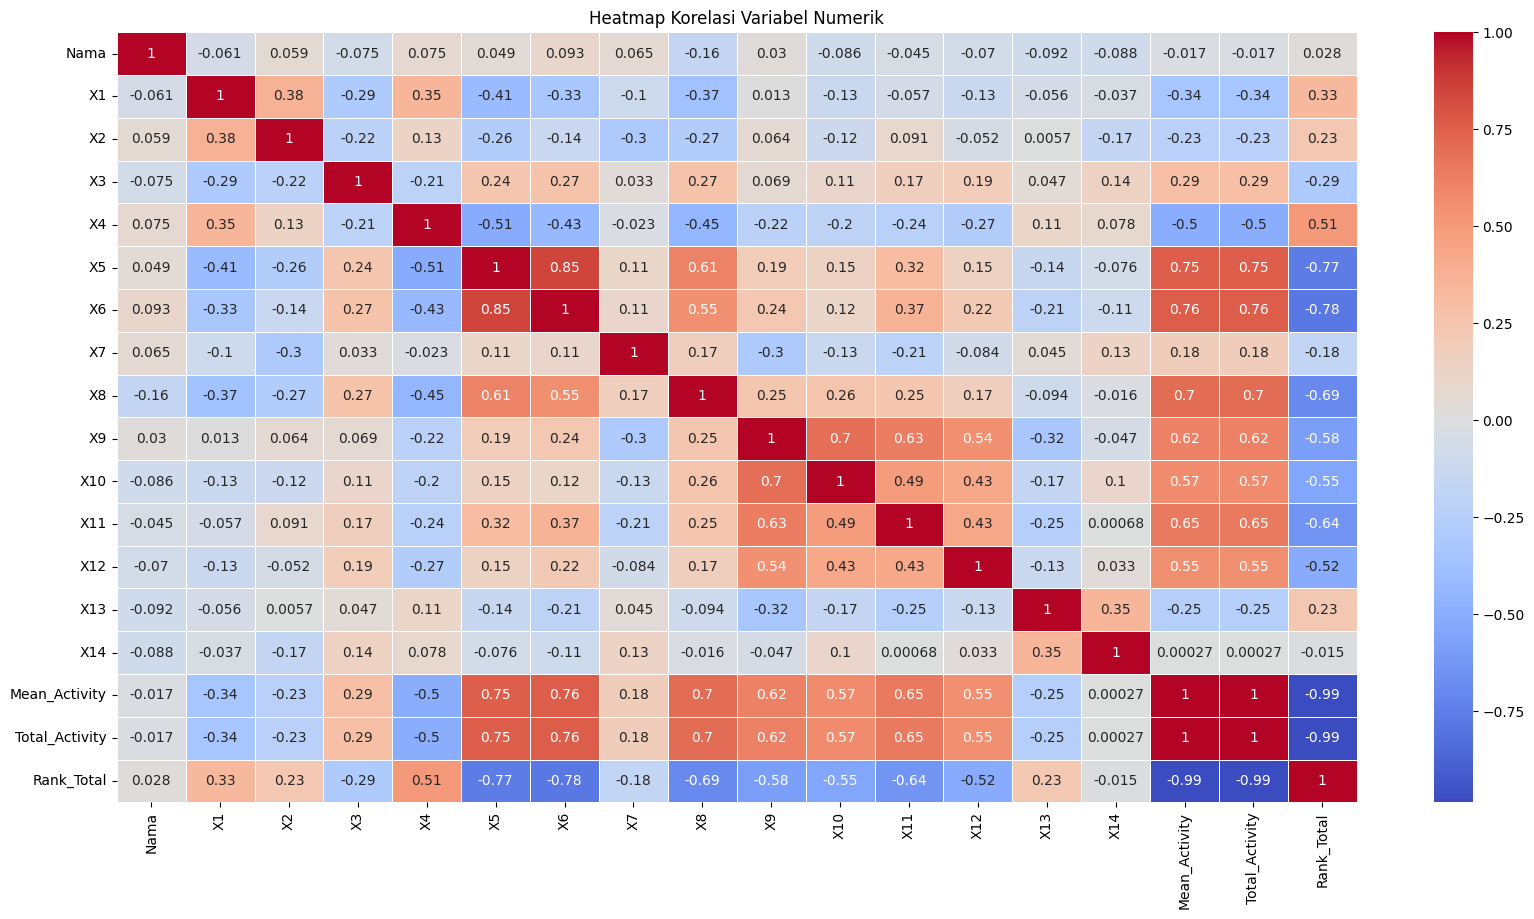

In [14]:

import seaborn as sns
plt.figure(figsize=(20, 10))

corr = num_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


Heatmap di atas menunjukkan hubungan (korelasi) antar variabel numerik (X5–X12), beserta variabel turunan (Mean_Activity, Total_Activity, Rank_Total). Nilai korelasi berkisar:

+1 → hubungan positif sempurna (jika variabel naik, variabel lain ikut naik)

–1 → hubungan negatif sempurna (jika variabel naik, variabel lain turun)

0 → tidak ada hubungan linear

Dari heatmap korelasi, terlihat bahwa beberapa aktivitas coding memiliki hubungan yang saling berkaitan kuat. Misalnya, X5 (unggah data) memiliki korelasi sangat tinggi dengan X6 (analisis data/jalankan program analisis). Secara logis, mahasiswa yang sering mengunggah data ke aplikasi coding biasanya juga lebih sering melakukan analisis data atau menjalankan program, sehingga kedua aktivitas ini bergerak bersama.

Selain itu, X8 (menjalankan/menguji program) dan X9 (meminta potongan kode kepada AI) juga memiliki korelasi besar. Ini menunjukkan bahwa mahasiswa yang aktif menjalankan program cenderung juga sering meminta bantuan AI untuk syntax atau potongan kode yang diperlukan. Hubungan ini menggambarkan pola penggunaan AI sebagai pendukung dalam proses eksekusi program.

Selanjutnya, X10 (menyelesaikan error dengan bantuan AI) dan X11 (meminta AI mengerjakan tugas coding secara langsung) juga menunjukkan hubungan positif yang cukup kuat. Artinya, semakin sering seseorang mengandalkan AI untuk debugging, semakin besar pula kecenderungan mereka memberi tugas coding langsung kepada AI. Kedua variabel ini merepresentasikan pola penggunaan AI yang sangat intensif dalam pemecahan masalah.

Di sisi lain, variabel seperti X7 (menulis kode tanpa bantuan AI) memiliki korelasi rendah terhadap sebagian besar variabel lainnya. Ini menunjukkan bahwa perilaku “coding manual” tidak selalu bergerak sejalan dengan aktivitas yang melibatkan AI atau aktivitas teknis lainnya seperti upload data, menjalankan program, atau debugging. Dengan kata lain, X7 merepresentasikan kelompok mahasiswa yang cenderung bekerja secara mandiri.

Variabel X1 (status pemrograman) dan X2 (jenis aktivitas coding) memiliki korelasi sedang hingga rendah dengan variabel aktivitas teknis lain, artinya kategori atau status seseorang tidak sepenuhnya menentukan intensitas aktivitas coding yang dilakukan. Aktivitas nyata lebih terlihat pada variabel-variabel X5 sampai X12.

Variabel kategori seperti X13 (aktivitas paling sering dilakukan) dan X14 (aktivitas setelah menggunakan AI) memiliki korelasi rendah dengan variabel numerik lain, karena sifatnya kategorikal sehingga wajar jika tidak bergerak sejalan secara numerik.

Secara keseluruhan, pola korelasi memperlihatkan bahwa aktivitas coding yang bersifat teknis (X5–X12) saling berkaitan kuat, terutama:

- Unggah data (X5) ↔ Analisis/jalankan program (X6)

- Menjalankan program (X8) ↔ Meminta kode ke AI (X9)

- Debugging dengan AI (X10) ↔ Meminta AI mengerjakan tugas coding (X11)

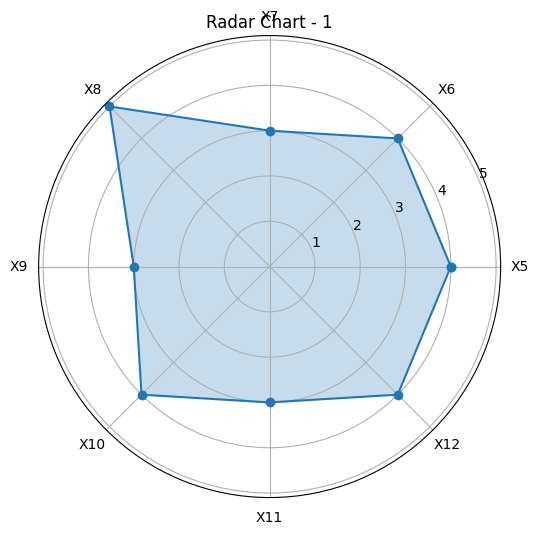

In [15]:
radar_cols = ['X5','X6','X7','X8','X9','X10','X11','X12']

def radar_chart(row):
    values = row[radar_cols].values
    name = row['Nama']

    values = np.append(values, values[0])

    angles = np.linspace(0, 2*np.pi, len(radar_cols), endpoint=False)
    angles = np.append(angles, angles[0])

    plt.figure(figsize=(6, 6))
    plt.polar(angles, values, marker='o')
    plt.fill(angles, values, alpha=0.25)
    plt.title(f"Radar Chart - {name}")
    plt.xticks(angles[:-1], radar_cols)
    plt.show()

radar_chart(df_encoded.iloc[0])


Berdasarkan radar chart yang menampilkan delapan jenis aktivitas coding, pola penggunaan aplikasi coding oleh Responden 1 menunjukkan kecenderungan yang cukup seimbang namun tetap menonjol pada beberapa aspek tertentu. Aktivitas yang paling sering dilakukan adalah menjalankan atau menguji program (X8), yang menandakan bahwa Responden 1 aktif melakukan eksperimen, pengujian logika, dan pengecekan hasil kode secara berulang. Selain itu, beberapa aktivitas seperti mengunggah data (X5), melakukan analisis atau menjalankan program analisis (X6), menyelesaikan error dengan bantuan AI (X10), serta meminta AI menjelaskan logika atau teori kode (X12) juga dilakukan cukup sering, sehingga menunjukkan bahwa Responden 1 memiliki alur kerja yang sistematis serta memanfaatkan AI sebagai pendamping belajar dan debugging. Sementara itu, aktivitas seperti menulis atau memperbarui kode tanpa bantuan AI (X7), meminta potongan kode kepada AI (X9), dan meminta AI mengerjakan tugas coding secara langsung (X11) berada pada tingkat sedang. Hal ini menggambarkan bahwa Responden 1 tetap mampu menulis kode sendiri dan tidak sepenuhnya bergantung pada AI, meskipun AI tetap menjadi alat bantu yang digunakan secara selektif. Secara keseluruhan, pola radar chart ini menunjukkan bahwa Responden 1 adalah pengguna aktif yang menggabungkan kemandirian dalam coding dengan pemanfaatan AI secara proporsional untuk menyelesaikan error, memahami konsep, dan meningkatkan efisiensi kerja.

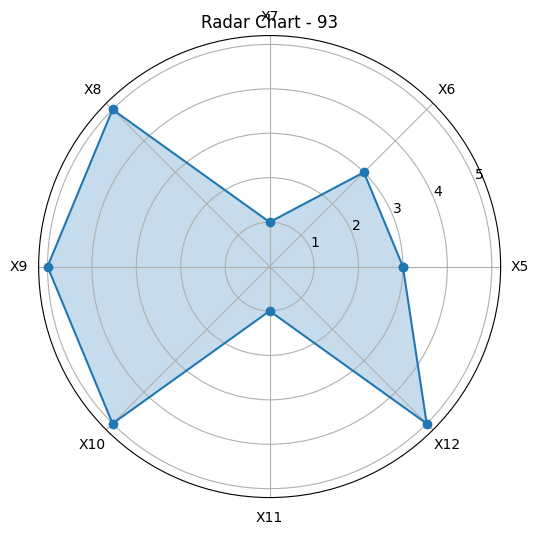

In [16]:
def radar_chart(row):
    values = row[radar_cols].values
    name = row['Nama']

    values = np.append(values, values[0])

    angles = np.linspace(0, 2*np.pi, len(radar_cols), endpoint=False)
    angles = np.append(angles, angles[0])

    plt.figure(figsize=(6, 6))
    plt.polar(angles, values, marker='o')
    plt.fill(angles, values, alpha=0.25)
    plt.title(f"Radar Chart - {name}")
    plt.xticks(angles[:-1], radar_cols)
    plt.show()

radar_chart(df_encoded.iloc[92])

Radar chart untuk Responden 93 menunjukkan pola penggunaan aplikasi coding yang sangat kuat pada aktivitas berbasis AI dan pengujian program, dengan kecenderungan yang jauh lebih tinggi dibandingkan aktivitas penulisan kode secara mandiri. Nilai tertinggi terlihat pada menjalankan atau menguji program (X8), meminta potongan atau syntax kode kepada AI (X9), menyelesaikan error dengan bantuan AI (X10), serta meminta AI menjelaskan logika atau teori kode (X12), yang semuanya berada pada level “sangat sering” (nilai 5). Pola ini mengindikasikan bahwa Responden 93 sangat mengandalkan AI dalam proses debugging, pemahaman konsep, dan penyediaan kode, sehingga AI menjadi pusat dari alur kerjanya. Sebaliknya, aktivitas menulis atau memperbarui kode tanpa bantuan AI (X7) dan meminta AI mengerjakan tugas coding secara langsung (X11) berada pada level sangat rendah (nilai 1), yang berarti ia jarang menulis kode secara mandiri maupun meminta AI menyelesaikan tugas sepenuhnya. Aktivitas seperti mengunggah data (X5) dan melakukan analisis (X6) berada pada tingkat sedang (nilai 3), menggambarkan bahwa bagian ini bukanlah fokus utama dalam rutinitasnya. Secara keseluruhan, Responden 93 tampak sebagai tipe pengguna yang sangat mengoptimalkan kemampuan AI untuk membantu debugging, memahami konsep, serta menghasilkan potongan kode, sementara kontribusi manualnya pada penulisan kode relatif terbatas, namun ia tetap aktif bereksperimen dengan menjalankan program secara intensif.

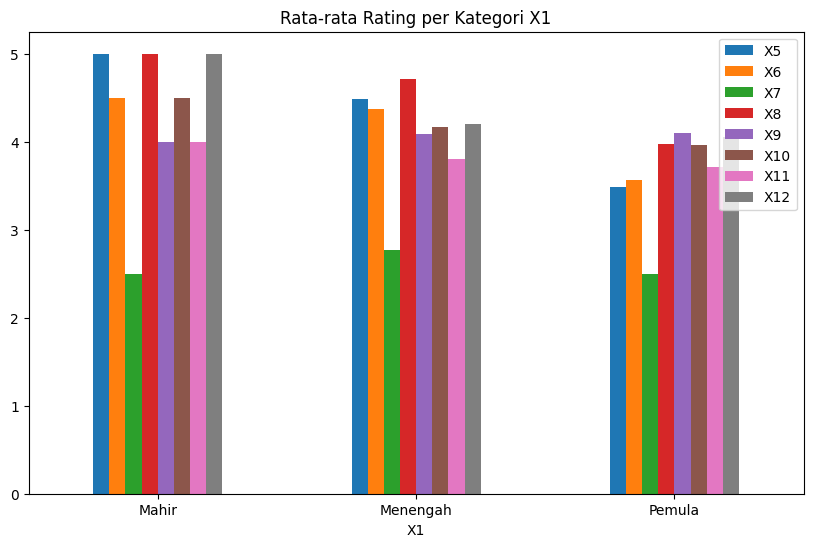

In [17]:
grouped = df.groupby("X1")[radar_cols].mean()

grouped.plot(kind="bar", figsize=(10,6))
plt.title("Rata-rata Rating per Kategori X1")
plt.xticks(rotation=0)
plt.show()

In [18]:
grouped.round(2)

,X5,X6,X7,X8,X9,X10,X11,X12
X1,,,,,,,,
Mahir,5.00,4.50,2.50,5.00,4.00,4.50,4.00,5.00
Menengah,4.49,4.37,2.77,4.71,4.09,4.17,3.80,4.20
Pemula,3.49,3.57,2.50,3.97,4.10,3.96,3.71,4.06


Berdasarkan visualisasi bar chart yang membandingkan tingkat frekuensi aktivitas coding (X5–X12) menurut status pemrograman (X1), terlihat pola yang cukup konsisten: semakin tinggi tingkat kemahiran pemrograman, semakin sering responden melakukan aktivitas coding yang bersifat teknis.

Kelompok mahir menunjukkan nilai rata-rata tertinggi pada hampir semua variabel X5–X12. Mereka lebih sering mengunggah data (X5), menganalisis program (X6), menjalankan kode (X8), dan menyelesaikan error dengan bantuan AI (X10).
Tingginya skor pada X12 (meminta AI menjelaskan teori kode) menunjukkan bahwa meskipun sudah mahir, mereka tetap memanfaatkan AI sebagai sumber pemahaman yang cepat. Secara umum, kelompok ini memperlihatkan aktivitas coding yang intensif dan stabil, mencerminkan kebiasaan kerja yang terstruktur dan sering berinteraksi dengan kode.

Selanjutnya kelompok menengah memiliki pola yang mirip dengan kelompok mahir, tetapi dengan rata-rata sedikit lebih rendah. Mereka masih cukup sering melakukan aktivitas terkait kode, terutama menjalankan program (X8) dan menganalisis kode (X6). Namun, frekuensi aktivitas seperti menulis kode tanpa AI (X7) dan meminta penjelasan logika (X12) sedikit turun dibandingkan kelompok mahir. Hal ini menggambarkan bahwa mereka berada pada tahap transisi: cukup memahami coding, tetapi masih mengandalkan AI dalam beberapa bagian proses.

Yang terakhir kelompok pemula memiliki nilai rata-rata paling rendah pada hampir semua variabel. Pemula lebih jarang mengunggah data, menulis kode tanpa bantuan AI, menjalankan program, maupun meminta penjelasan teori. Nilai X8 (menjalankan program) dan X10 (memperbaiki error menggunakan AI) masih relatif stabil, menunjukkan bahwa mereka paling sering berinteraksi dengan AI ketika mengalami error atau membutuhkan bantuan langsung. Secara keseluruhan, aktivitas coding mereka lebih terbatas dan bersifat reaktif, bukan proaktif seperti kelompok mahir.